In [1]:
# 📌 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import joblib


In [2]:
# 📌 2. Load the dataset
df = pd.read_csv("customer_data.csv")  # Make sure this file is in the same folder
df.head()


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Purchase_Frequency,Last_Purchase_Date,Total_Spending,Marital_Status,Family_Size,Interested_Categories
0,1,Other,56,35795,93,15,2025-03-27,7907.06,Widowed,5,"Books, Gaming, Groceries"
1,2,Other,36,148214,75,11,2025-04-15,3670.23,Widowed,3,"Groceries, Gaming"
2,3,Female,19,79735,30,6,2025-01-01,9926.01,Widowed,1,"Home Decor, Books"
3,4,Male,39,91932,89,17,2025-05-14,4298.68,Divorced,4,"Groceries, Books, Fitness"
4,5,Other,64,55773,51,12,2025-05-18,9840.69,Widowed,1,"Fitness, Home Decor, Electronics"


In [4]:
# 📌 3. Drop non-relevant columns
df_clean = df.drop(columns=["CustomerID", "Last_Purchase_Date"])


In [5]:
# 📌 4. Define features
numerical_features = ["Age", "Annual_Income", "Spending_Score",
                      "Purchase_Frequency", "Total_Spending", "Family_Size"]
categorical_features = ["Gender", "Marital_Status"]


In [6]:
# 📌 5. Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

In [7]:
# 📌 6. Create pipeline with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("kmeans", kmeans)
])


In [8]:
# 📌 7. Fit the model and add cluster labels
pipeline.fit(df_clean)
df_clean["Cluster"] = pipeline.predict(df_clean)
df_clean.head()


,Gender,Age,Annual_Income,Spending_Score,Purchase_Frequency,Total_Spending,Marital_Status,Family_Size,Interested_Categories,Cluster
0,Other,56,35795,93,15,7907.06,Widowed,5,"Books, Gaming, Groceries",2
1,Other,36,148214,75,11,3670.23,Widowed,3,"Groceries, Gaming",0
2,Female,19,79735,30,6,9926.01,Widowed,1,"Home Decor, Books",2
3,Male,39,91932,89,17,4298.68,Divorced,4,"Groceries, Books, Fitness",1
4,Other,64,55773,51,12,9840.69,Widowed,1,"Fitness, Home Decor, Electronics",2


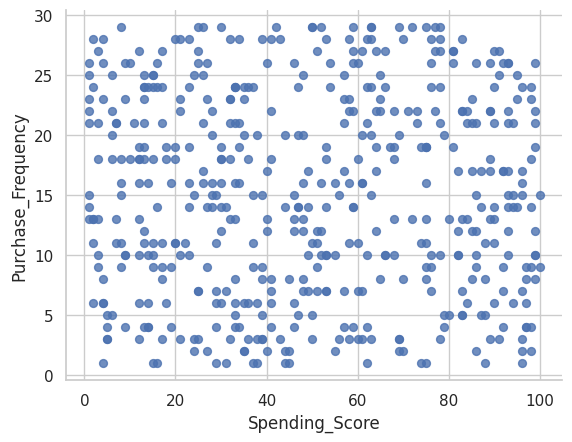

In [19]:
# @title Spending_Score vs Purchase_Frequency

from matplotlib import pyplot as plt
df_clean.plot(kind='scatter', x='Spending_Score', y='Purchase_Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

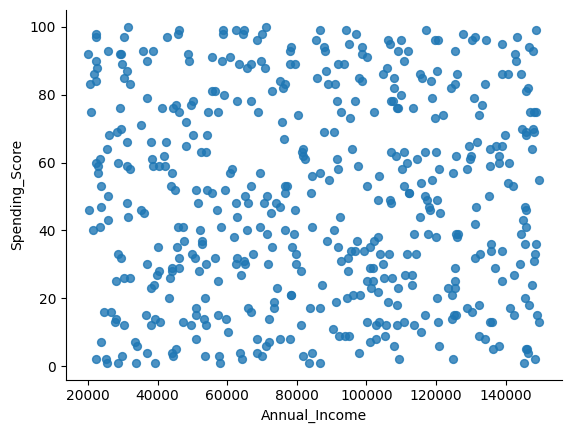

In [9]:
# @title Annual_Income vs Spending_Score

from matplotlib import pyplot as plt
df_clean.plot(kind='scatter', x='Annual_Income', y='Spending_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

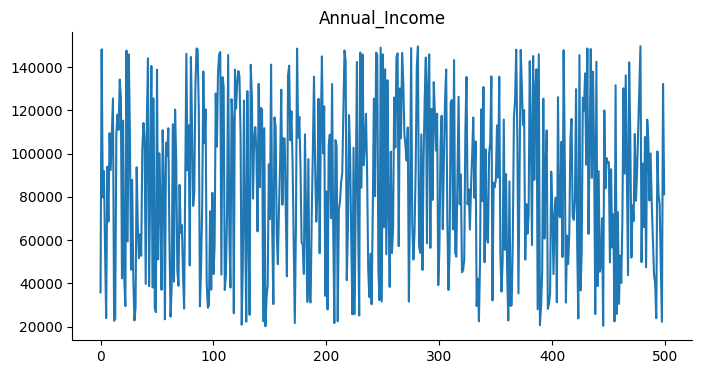

In [10]:
# @title Annual_Income

from matplotlib import pyplot as plt
df_clean['Annual_Income'].plot(kind='line', figsize=(8, 4), title='Annual_Income')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
# 📌 8. Save model and preprocessor
joblib.dump(pipeline.named_steps["kmeans"], "customer_segment_model.joblib")
joblib.dump(pipeline.named_steps["preprocessor"], "scaler.joblib")
df_clean.to_csv("cleaned_customers.csv", index=False)


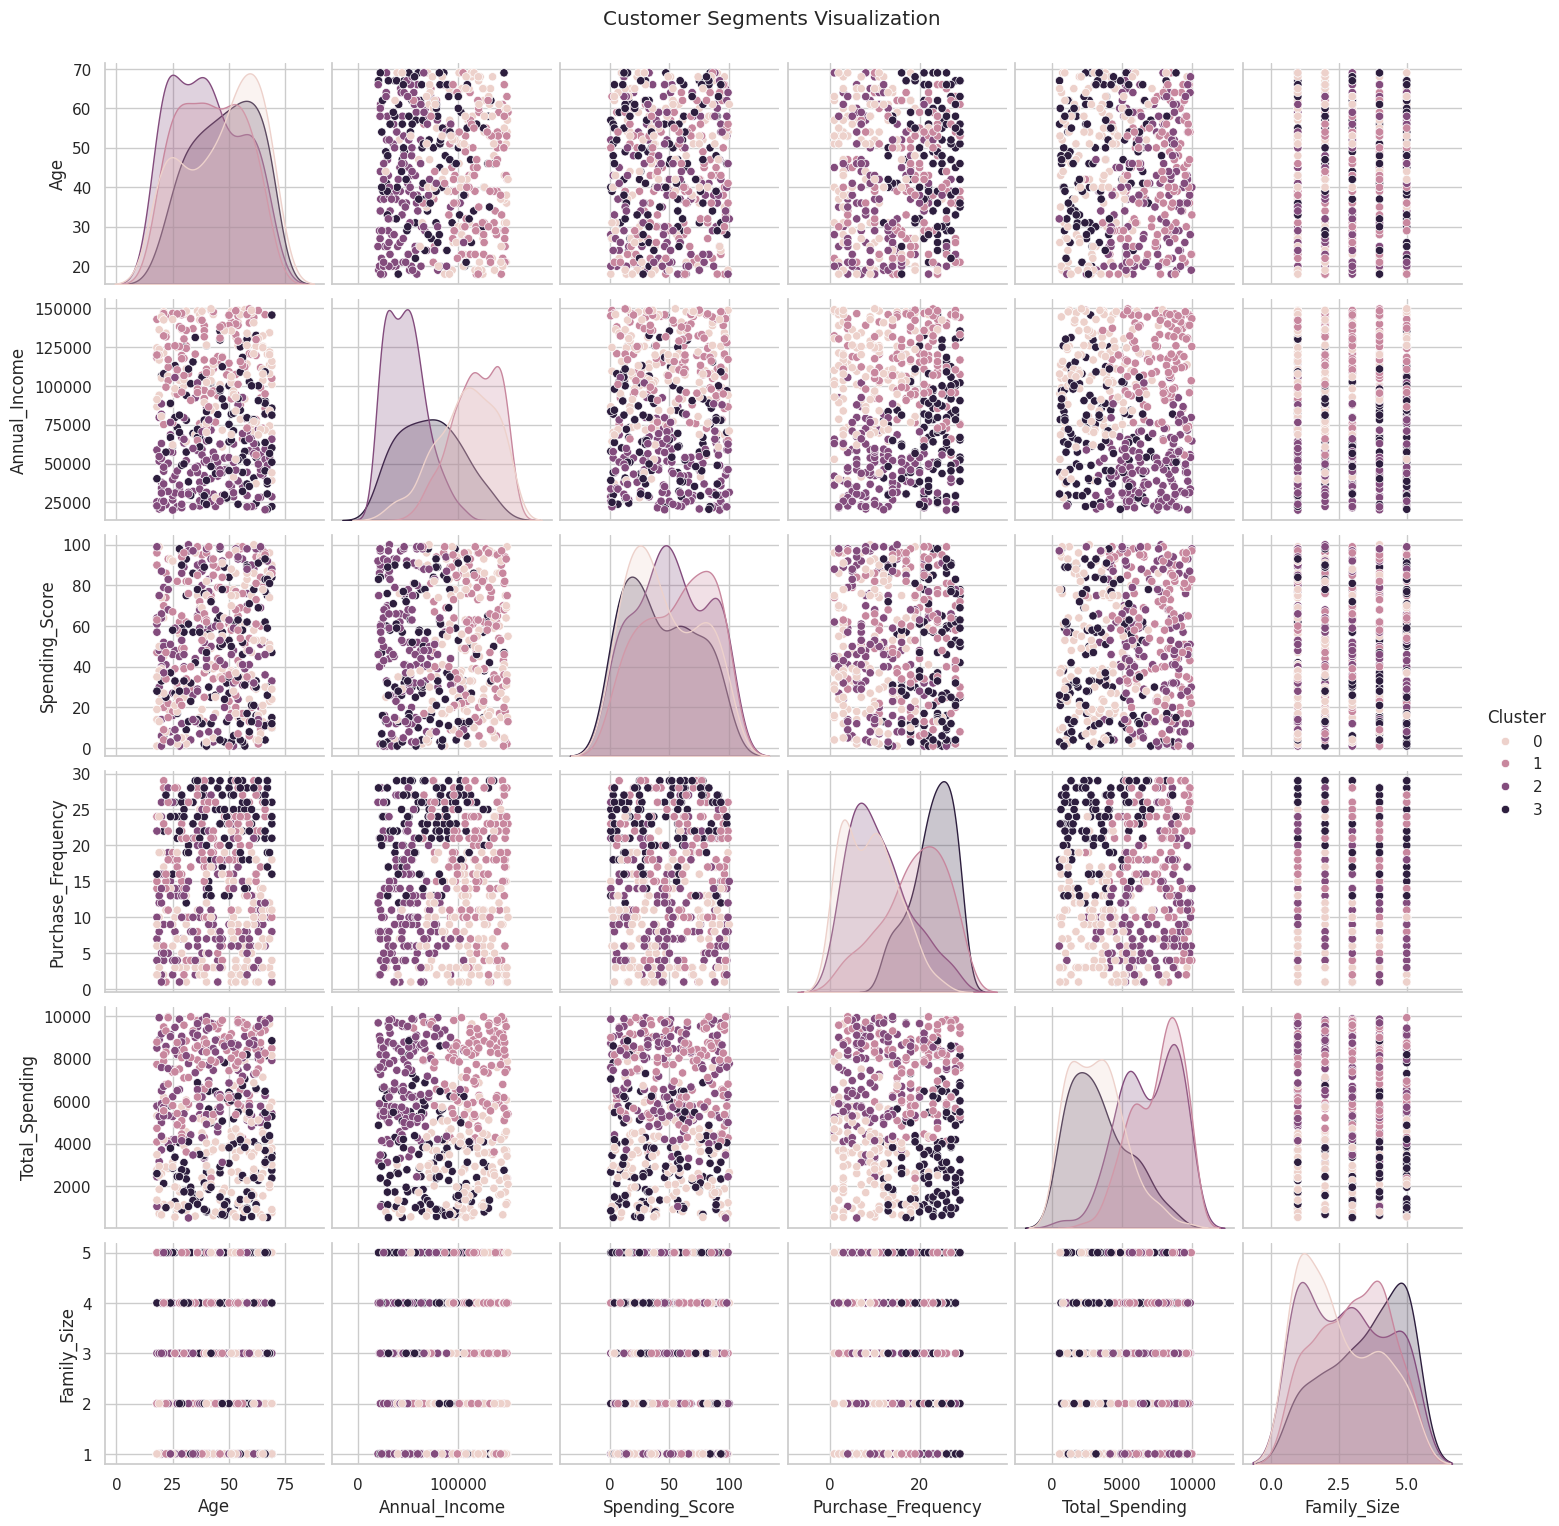

In [10]:
# 📌 9. Visualize clusters using pairplot
sns.set(style="whitegrid")
sns.pairplot(df_clean, hue="Cluster", diag_kind="kde")
plt.suptitle("Customer Segments Visualization", y=1.02)
plt.show()


In [14]:
# 📌 10. Cluster-wise statistics
df_clean[numerical_features + ['Cluster']].groupby("Cluster").mean()

,Age,Annual_Income,Spending_Score,Purchase_Frequency,Total_Spending,Family_Size
Cluster,,,,,,
0,46.677165,107135.748031,45.685039,9.039370,3183.132362,2.488189
1,42.000000,117102.040984,56.778689,18.704918,7517.324098,3.016393
2,40.130435,47618.717391,51.891304,11.021739,6890.141522,2.811594
3,47.876106,72705.380531,43.212389,22.814159,3383.269292,3.495575


In [15]:
# 📌 11. Save Scaled Dataset to df_scaled.csv
scaled_data = pipeline.named_steps["preprocessor"].transform(df_clean.drop(columns=["Cluster"]))
scaled_df = pd.DataFrame(scaled_data, columns=pipeline.named_steps["preprocessor"].get_feature_names_out())

scaled_df.to_csv("df_scaled.csv", index=False)
print("✅ Scaled dataset saved as df_scaled.csv")


✅ Scaled dataset saved as df_scaled.csv
